In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [ ]:
df.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [ ]:
df.shape

(50000, 8)

In [ ]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [ ]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
#get a random sample of 10000
rn_sample_df = df.sample(100000,replace=True)

In [ ]:
#Separate the date, time and hour from the pickup time
rn_sample_df['date_time_of_pickup'] = pd.to_datetime(rn_sample_df['date_time_of_pickup'], format= "%Y-%m-%d %H:%M:%S UTC")

# 2009-06-15 17:26:21 UTC
# add time information
rn_sample_df['year'] = rn_sample_df.date_time_of_pickup.apply(lambda t: t.year)
rn_sample_df['weekday'] = rn_sample_df.date_time_of_pickup.apply(lambda t: t.weekday())
rn_sample_df['hour'] = rn_sample_df.date_time_of_pickup.apply(lambda t: t.hour)

In [ ]:
#Measure the Distance(miles) from the latitude and longitude for both pickup and dropoff
def distance(lat1, lon1, lat2, lon2):
    
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [ ]:
rn_sample_df['distance'] = distance(rn_sample_df.latitude_of_pickup, rn_sample_df.longitude_of_pickup, 
                                    rn_sample_df.latitude_of_dropoff, rn_sample_df.longitude_of_dropoff)

In [ ]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [ ]:
#Removing the coloumns with null values
rn_sample_df = rn_sample_df.dropna()

In [ ]:
#Removing the fare price less than zero
rn_sample_df = rn_sample_df[rn_sample_df.amount > 0]

In [ ]:
# Removing the distance(mile) less than zero
rn_sample_df = rn_sample_df[rn_sample_df.distance > 0]

In [ ]:
# now removing the key and pickup_datetime coloumn from the dataset
rn_sample_df = rn_sample_df.drop([ 'date_time_of_pickup'], axis=1)

In [ ]:
# Data Visualisation
rn_sample_df.head()

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,weekday,hour,distance
36261,47:38.0,36.83,-73.865807,40.770679,-73.989792,40.733231,1,2015,1,7,6.986344
8460,01:00.0,6.10,-73.972683,40.755110,-73.965795,40.762558,5,2010,3,18,0.628309
14795,54:02.0,8.50,-74.005958,40.739691,-73.994135,40.724265,1,2013,1,1,1.232551
15955,57:00.0,16.00,-74.008187,40.714432,-74.000677,40.729930,1,2013,4,16,1.140738
26811,04:00.0,8.50,-73.958443,40.781658,-73.982042,40.770665,1,2009,4,18,1.449659


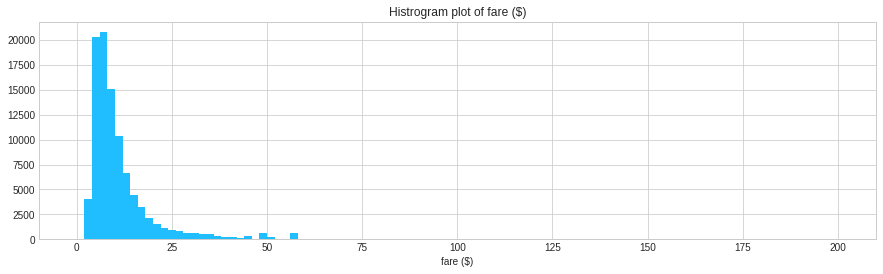

In [ ]:
#Histrogram plot of fare price
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 4))

plt.hist(rn_sample_df['amount'], bins=100, color='#20beff')
plt.xlabel("fare ($)")
plt.title("Histrogram plot of fare ($)")
plt.show()

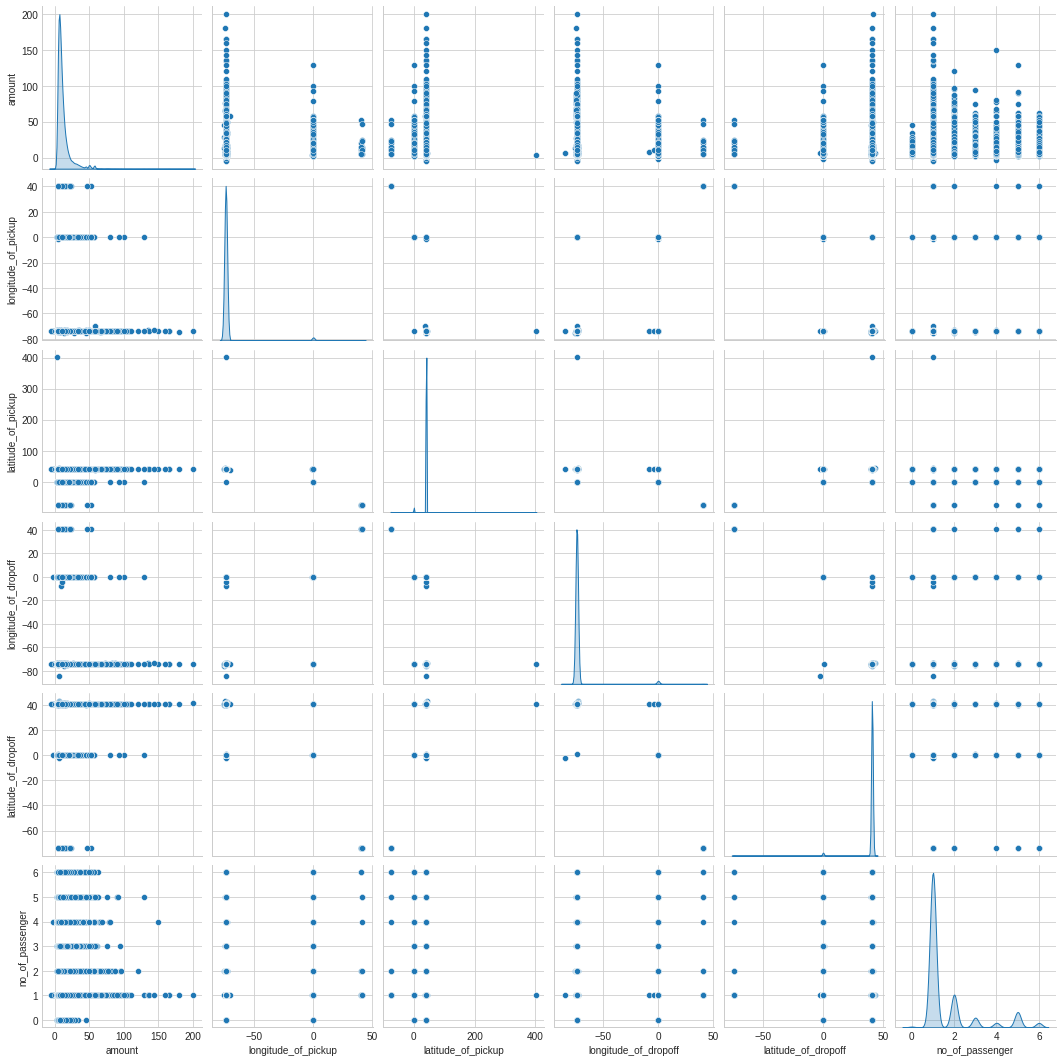

In [ ]:
sns.pairplot(df , diag_kind='kde')

In [ ]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [ ]:
df.drop(["unique_id","date_time_of_pickup","longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"],axis=1,inplace=True)

In [ ]:
X = df.drop(["amount"], axis=1)
#dependent variable
Y= df["amount"]

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y ,test_size=0.30, random_state=1)

In [ ]:
model_1 = LinearRegression()

In [ ]:
df.dtypes

amount             float64
no_of_passenger      int64
dtype: object

In [ ]:
model_1.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model_1.score(X_train, Y_train)

0.0004711541070612224

In [ ]:
model_1.score(X_test, Y_test)

-0.00034195241835011103

In [ ]:
from sklearn.svm import SVR

In [ ]:
model_2=SVR(kernel="linear",gamma="auto",C=1.0)
model_2.fit(X_train,Y_train)

SVR(gamma='auto', kernel='linear')

In [ ]:
df.dtypes

amount             float64
no_of_passenger      int64
dtype: object

In [ ]:
model_2.score(X_train,Y_train)

-0.09292986811181136

In [ ]:
model_2.score(X_test,Y_test)

-0.08785177594079707

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_3= DecisionTreeRegressor( max_depth=2)

In [ ]:
model_3.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2)

In [ ]:
model_3.score(X_train,Y_train)

0.0010600198473214029

In [ ]:
model_3.score(X_test,Y_test)

0.00042171779416000366

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X_log = np.log(X_train)
y_log = np.log(Y_train)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Instance and fit
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, Y_train)

# Score
score_knn = knn_model.score(X_test, Y_test)
score_knn

-0.05589556459091716

In [ ]:

# Predictions
preds = knn_model.predict(X_test)

# Performance
performance = pd.DataFrame({ 'True Value': Y_test,
                            'Prediction': preds,
                            'Error': Y_test - preds})
# View
performance

,True Value,Prediction,Error
26247,9.0,10.30,-1.30
35067,6.5,8.78,-2.28
34590,9.5,10.30,-0.80
16668,7.5,10.30,-2.80
12196,9.0,15.06,-6.06
...,...,...,...
14876,7.7,10.30,-2.60
42772,8.9,10.30,-1.40
37248,8.1,10.30,-2.20
6246,7.0,10.30,-3.30


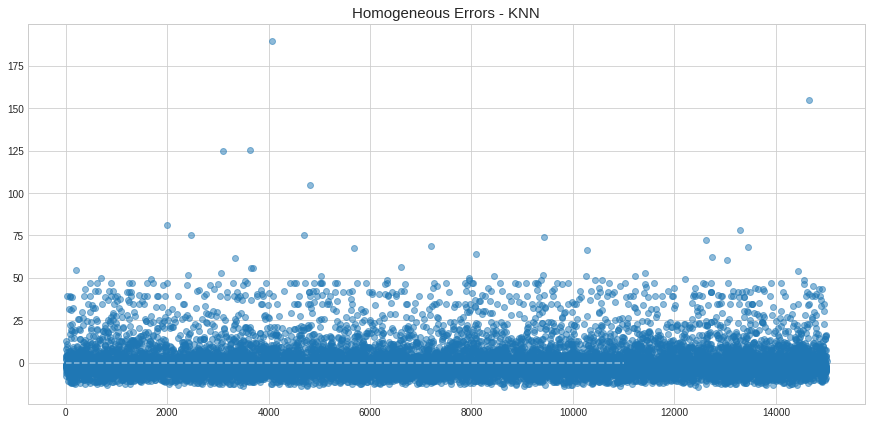

In [ ]:
plt.figure(figsize=(15,7))
# Errors
ax_x= performance['True Value']
ax_y= performance['Prediction']
yerr= performance['Error']

plt.scatter(range(len(yerr)), yerr, alpha=.5)
plt.title('Homogeneous Errors - KNN', size=15);
plt.hlines(y=0, xmin=0, xmax=11000, linestyle='--', color='white', alpha=.5);
#plt.ylim(-.3, .3);

In [ ]:
# evaluate bagging ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor

In [ ]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=5)
# define the model
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -101.239 (10.469)


In [ ]:
###### Adaboost Regression in Python #######
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


In [ ]:
#Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=1)
RegModel = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=1)

In [ ]:
#Printing all the parameters of Adaboost
print(RegModel)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  learning_rate=1)


In [ ]:
#Creating the model on Training Data
AB=RegModel.fit(X_train,Y_train)
prediction=AB.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(Y_train, AB.predict(X_train)))

R2 Value: -0.03726155748319426


In [ ]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((Y_test - prediction) / Y_test)) * 100))

Accuracy -inf


In [ ]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [ ]:
#Fit regression model
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 93.8084


In [ ]:
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.datasets import make_regression
 X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
 regr = RandomForestRegressor(max_depth=2, random_state=0)
 regr.fit(X, y)
RandomForestRegressor(...)
 print(regr.predict([[0, 0, 0, 0]]))

[-8.32987858]
